In [12]:
# importing dependencies
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
from PIL import Image,ImageOps
import cv2 as cv

Saving abc.jpg to abc (1).jpg


In [13]:
# defining a denoising algorithm that removes noise on the basis of the gradient change of the image
# does not blur the image for removal of noise like the Blur and Gaussian Blur methods of opencv
def denos(image,weight,eps = 1e-3,iter = 200):
  '''
  Inputs : 
  image : The array form of the image to be denoised
  weight : The weight to be used in the denoise algorithm
  eps : The error allowance at which the algorith stops denoising the image
  iter : Number of iterations

  Output :
  denos : The array form of the denoised image
  '''
  u = np.zeros_like(image)
  px = np.zeros_like(image)
  py = np.zeros_like(image)

  nm = np.prod(image.shape[:2])
  t = 0.125

  i = 0
  while i < iter:
    u_old = u

    ux = np.roll(u,-1,axis = 1) - u
    uy = np.roll(u,-1,axis = 0) - u

    px_new = px + (ux*t)/weight
    py_new = py + (uy*t)/weight

    norm_new = np.maximum(1,np.linalg.norm(px_new**2 + py_new**2))
    px = px_new/norm_new
    py = py_new/norm_new

    rx = np.roll(px,-1,axis = 1)
    ry = np.roll(py,-1,axis = 0)
    divergence = (px - rx) + (py - ry)

    u = image + weight*divergence

    error = np.linalg.norm(u - u_old)/np.sqrt(nm)

    if i == 0:
      err_init = error
      err_prev = error
    else:
      e_prev = error
    i += 1
  return u

(300, 300, 2)


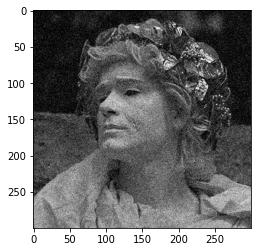

In [14]:
# opening the image using the PIL and openCV libraries
x = Image.open('abc.jpg').convert('LA')
x2 = cv.imread('abc.jpg')
plt.imshow(x)
print(np.asarray(x).shape)

In [15]:
'''
    Here we take the input image and run it through the function defined above.
    As the value of the weight increases, the noise is reduced but at a tradeoff
    of the preservation of the originality of the image, as shown in the following
    cell. 
'''
x_inp = np.asarray(x)
#print(x_inp.shape)
#plt.imshow(x_inp)
x_denoised = denos(x_inp,weight = 200)
print(x_denoised.shape)
x_denoised_array = Image.fromarray(np.uint8(x_denoised))

(300, 300, 2)


(300, 300, 3)


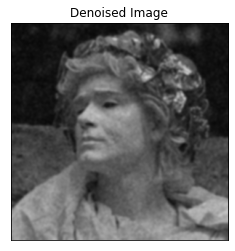

In [16]:
# using a slight Gaussian Blur for the final touches on the image 

figurehead = cv.imread('abc.jpg')
deno = denos(figurehead,50)
#print(type(figurehead))
#print(figurehead.shape)
cleanfigurehead = cv.GaussianBlur(deno,(7,7),0)
print(cleanfigurehead.shape)
#print(cleanfigurehead)
plt.title('Denoised Image')
plt.xticks([])
plt.yticks([])
plt.imshow(Image.fromarray(np.uint8(cleanfigurehead)))

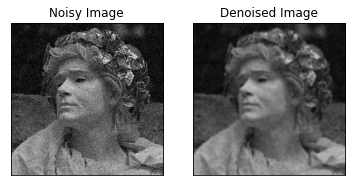

In [17]:
# comparing the original image to the final image
plt.subplot(121)
plt.title('Noisy Image')
plt.xticks([])
plt.yticks([])
plt.imshow(x)
plt.subplot(122)
plt.title('Denoised Image')
plt.xticks([])
plt.yticks([])
plt.imshow(np.uint8(cleanfigurehead))

In [18]:
cleanfigurehead = np.uint8(cleanfigurehead)

<class 'numpy.ndarray'>


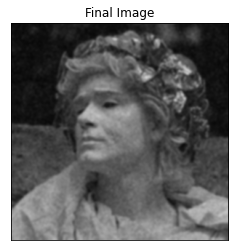

In [19]:
# Final Result
print(type(cleanfigurehead))
clean = Image.fromarray(cleanfigurehead)
plt.title('Final Image')
plt.xticks([])
plt.yticks([])
plt.imshow(clean)